<h2>Load Data</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as pl

# load training data
training_data = np.loadtxt('Occupancy Detection/data/trainingdata.txt', usecols=(2,3,4,5,6,7), skiprows=1, delimiter=',')
x_training = training_data[:, :-1]
y_training = training_data[:, -1]

# load testing data
testing_data = np.loadtxt('Occupancy Detection/data/testingdata.txt', usecols=(2,3,4,5,6,7), skiprows=1, delimiter=',')
x_testing = testing_data[:, :-1]
y_testing = testing_data[:, -1]

# feature names and their indexes on the 2D NumPy array
feature_index_names = {0:'Temperature', 1:'Humidity', 2:'Light', 3:'CO2', 4:'Humidity_Ratio'}

x_training_selected = x_training[:,[2, 3]]
x_testing_selected = x_testing[:,[2, 3]]

for i in range(y_training.shape[0]):
    if y_training[i] == 0:
        y_training[i] = -1
for i in range(y_testing.shape[0]):
    if y_testing[i] == 0:
        y_testing[i] = -1

<h2>Perceptron</h2>
<b>Note: </b>Only works for linearly separable data

In [2]:
def perceive(X,Y,T=100):
    w = np.zeros(X.shape[1]+1)
    classified = False
    t = 1
    while not classified and t<=T:
        if t%5 == 0:
            print("Running Epoch ",t)
        classified = True
        for n in range(Y.shape[0]):
            x = np.insert(X[n],0,1,axis=0)
            if Y[n]*np.dot(w,x) <= 0:
                classified = False
                w = w + np.sign(Y[n])*x
        t+=1
    return w
                
    
w_perceptron = perceive(x_training_selected,y_training,T=200)

Running Epoch  5
Running Epoch  10
Running Epoch  15
Running Epoch  20
Running Epoch  25
Running Epoch  30
Running Epoch  35
Running Epoch  40
Running Epoch  45
Running Epoch  50
Running Epoch  55
Running Epoch  60
Running Epoch  65
Running Epoch  70
Running Epoch  75
Running Epoch  80
Running Epoch  85
Running Epoch  90
Running Epoch  95
Running Epoch  100
Running Epoch  105
Running Epoch  110
Running Epoch  115
Running Epoch  120
Running Epoch  125
Running Epoch  130
Running Epoch  135
Running Epoch  140
Running Epoch  145
Running Epoch  150
Running Epoch  155
Running Epoch  160
Running Epoch  165
Running Epoch  170
Running Epoch  175
Running Epoch  180
Running Epoch  185
Running Epoch  190
Running Epoch  195
Running Epoch  200


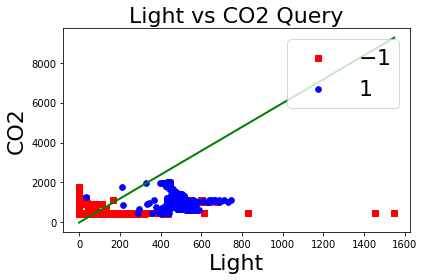

In [74]:
def scatter_plot_two_features_only(x, y, feature1_name, feature2_name, w, save_figures=False):
    c = ['r', 'b', 'g']
    m = ['s', 'o', '*']
    s = [32, 32, 64]
    l = [r'$-1$', r'$1$', r'query']
    font_size = 22
    x_class0 = x[y==-1, :]
    x_class1 = x[y==1.0, :]    
    figure_name = feature1_name + ' vs ' + feature2_name + ' Query'
    pl.figure(figure_name)
    pl.scatter(x_class0[:, 0], x_class0[:, 1], c=c[0], marker=m[0], s=s[0], label=l[0])
    pl.scatter(x_class1[:, 0], x_class1[:, 1], c=c[1], marker=m[1], s=s[1], label=l[1])
    plot_x = np.array([min(x[:,0]) - 2, max(x[:,0]) + 2])
    plot_y = (-(w[0] / w[2]) / (w[0] / w[1]))*plot_x + (-w[0] / w[2])
    pl.plot(plot_x,plot_y, c = c[2], linewidth=2)    
    pl.xlabel(feature1_name, fontsize=font_size)
    pl.ylabel(feature2_name, fontsize=font_size)
    pl.legend(scatterpoints=1, fontsize=font_size, loc = 'upper right')
    pl.title(figure_name, fontsize=font_size)
    pl.tight_layout()
    if save_figures:
        pl.savefig(figure_name + '.png')
        
scatter_plot_two_features_only(x_training_selected,y_training,feature_index_names[2], feature_index_names[3],w_perceptron)

<h2>SVM</h2>

In [75]:
def pegasos(X,Y,lamda = 0.5,T = 10000):
    w = np.zeros(X.shape[1]+1)
    for t in range(1,T+1):
        index = np.random.randint(Y.shape[0])
        x = np.insert(X[index],0,1,axis=0)
        y = Y[index]
        nu = 1.0/(lamda*t)
        if y*np.dot(w,x)<1:
            w = (1-nu*lamda)*w + nu*y*x
        else:
            w = (1-nu*lamda)*w
    return w

w_svm = pegasos(x_training_selected,y_training)

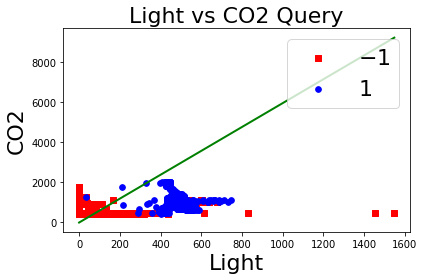

In [76]:
scatter_plot_two_features_only(x_training_selected,y_training,feature_index_names[2], feature_index_names[3],w_svm)

In [78]:
print("Testing")
correct = 0
for i in range(y_testing.shape[0]):
    x = np.insert(x_testing_selected[i],0,1,axis=0)
    prediction = np.dot(w_svm,x)
    #print("Y = ",y_testing[i],"Prediction = ",prediction,"\n")
    if(y_testing[i]*prediction>0):
        correct += 1
print(correct/y_testing.shape[0])
print("Training")
correct = 0
for i in range(y_training.shape[0]):
    x = np.insert(x_training_selected[i],0,1,axis=0)
    prediction = np.dot(w_svm,x)
    #print("Y = ",y_testing[i],"Prediction = ",prediction,"\n")
    if(y_training[i]*prediction>0):
        correct += 1
print(correct/y_training.shape[0])

Testing
0.9711069418386492
Training
0.9255802529780179
